# MultiCollinearity & Recursive method
This document explains the multi collinearity between independent features. Depending on p-value and std error terms, one can decide 
whether to delete the independent feature or not.
For this we need to use OLS function, to find the independent coefficient's vlaues.

#REF: recursive function to remove features

In [31]:
import numpy as np
import pandas as pd

In [59]:
df = pd.read_csv(r"C:\Users\User\Downloads\Machine-Learning-with-Real-World-Projects-master\Machine-Learning-with-Real-World-Projects-master\Section 2\Multiple Linear Regression\Housing.csv")

In [60]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [61]:

df['mainroad'] = df['mainroad'].map({'yes':1,'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1,'no':0})
df['basement'] = df['basement'].map({'yes':1,'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1,'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1,'no':0})


In [62]:
status = pd.get_dummies(df['furnishingstatus'],drop_first=True)

In [63]:
df = pd.concat([df,status], axis=1)

In [64]:
df.drop(['furnishingstatus'],axis=1,inplace=True)

In [65]:
df['bbratio'] = df['bathrooms']/df['bedrooms']
df['areaperbedrooms'] = df['area']/df['bedrooms']

In [66]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,bbratio,areaperbedrooms
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,0.500000,1855.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,1.000000,2240.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,0.666667,3320.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,0.500000,1875.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,0.250000,1855.0


In [70]:
y = df.iloc[:,:1]

In [71]:
X = df.iloc[:,1:]

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

# Buildins a linear model

# Checking VIF

In [46]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [73]:
X_train.columns


Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished', 'bbratio', 'areaperbedrooms'],
      dtype='object')

In [76]:
X_train.shape

(381, 15)

# train the model

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [81]:
lm = LinearRegression()
rfe = RFE(lm)

In [82]:
rfe = rfe.fit(X_train,y_train)

In [83]:
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True  True False  True  True False  True False
 False  True False]
[9 7 1 4 1 1 5 1 1 3 1 6 2 1 8]


In [84]:
rfe

RFE(estimator=LinearRegression())

In [85]:
col = X_train.columns[rfe.support_]

In [86]:
col

Index(['bathrooms', 'mainroad', 'guestroom', 'hotwaterheating',
       'airconditioning', 'prefarea', 'bbratio'],
      dtype='object')

# Building model using sklearn

In [87]:
#Building model using sklearn
#take the columns only taking the selected columns
x_train_ref = X_train[col]

In [101]:
#Adding constant variable
import statsmodels.api as sm
x_train_ref = sm.add_constant(x_train_ref)

In [102]:
model_1 = sm.OLS(y_train,x_train_ref).fit()

In [103]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     70.13
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           3.36e-64
Time:                        17:25:56   Log-Likelihood:                -5872.1
No. Observations:                 381   AIC:                         1.176e+04
Df Residuals:                     373   BIC:                         1.179e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.335e+06   2.44e+05     

In [104]:
vif_cal(input_data = df.drop(['area','bedrooms','stories','semi-furnished','areaperbedrooms'],axis=1), dependent_col='price')

,Var,Vif
9,bbratio,17.47
0,bathrooms,17.25
1,mainroad,5.22
6,parking,1.84
3,basement,1.83
5,airconditioning,1.63
7,prefarea,1.47
2,guestroom,1.46
8,unfurnished,1.43
4,hotwaterheating,1.09


In [105]:
#predict the model
#select the same columns for x_test
x_test_ref = X_test[col]
x_test_ref = sm.add_constant(x_test_ref)



  

In [106]:
y_pred = model_1.predict(x_test_ref)

In [107]:
x_train_ref.columns

Index(['const', 'bathrooms', 'mainroad', 'guestroom', 'hotwaterheating',
       'airconditioning', 'prefarea', 'bbratio'],
      dtype='object')

In [109]:
x_train_ref.shape

(381, 8)

# Model Evaluation

In [108]:
import matplotlib.pylab as plt
import seaborn as sns

Text(0, 0.5, 'housingPrice')

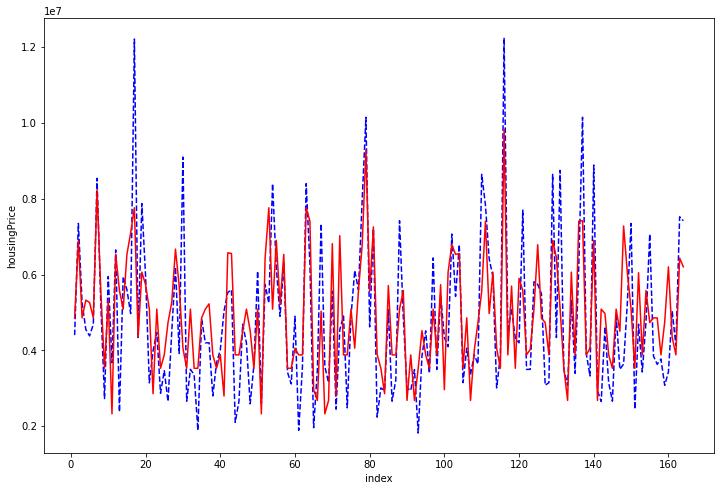

In [113]:
c = [i for i in range(1,165,1)]
fig = plt.figure(figsize=(12,8))
plt.plot(c,y_test,color='blue', linestyle='--')
plt.plot(c,y_pred,color='red', linestyle='-')
plt.xlabel('index', fontsize=10)
plt.ylabel('housingPrice', fontsize=10)

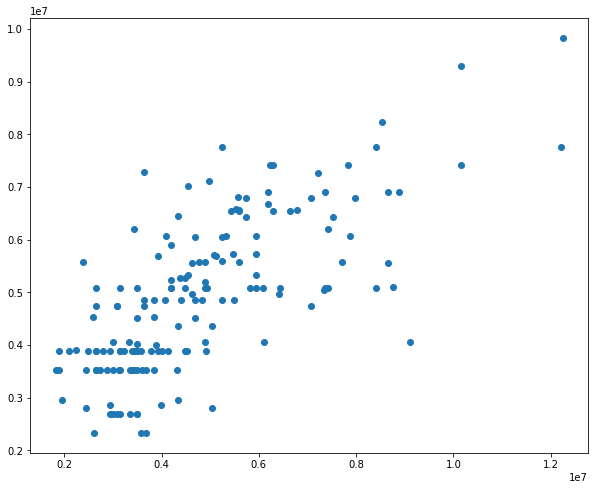

In [116]:
import seaborn as sns
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)

In [117]:
#RMSE
from sklearn import metrics
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE 1380178.025336671


In [ ]:
                                #